In [1]:
# you may ignore this cell
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression                         
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors                           
from sklearn import tree, linear_model                         
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import joblib

In [2]:
df=pd.read_csv('heloc_dataset_v1.csv')

In [3]:
#explore the data
df.head(3)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86


In [4]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


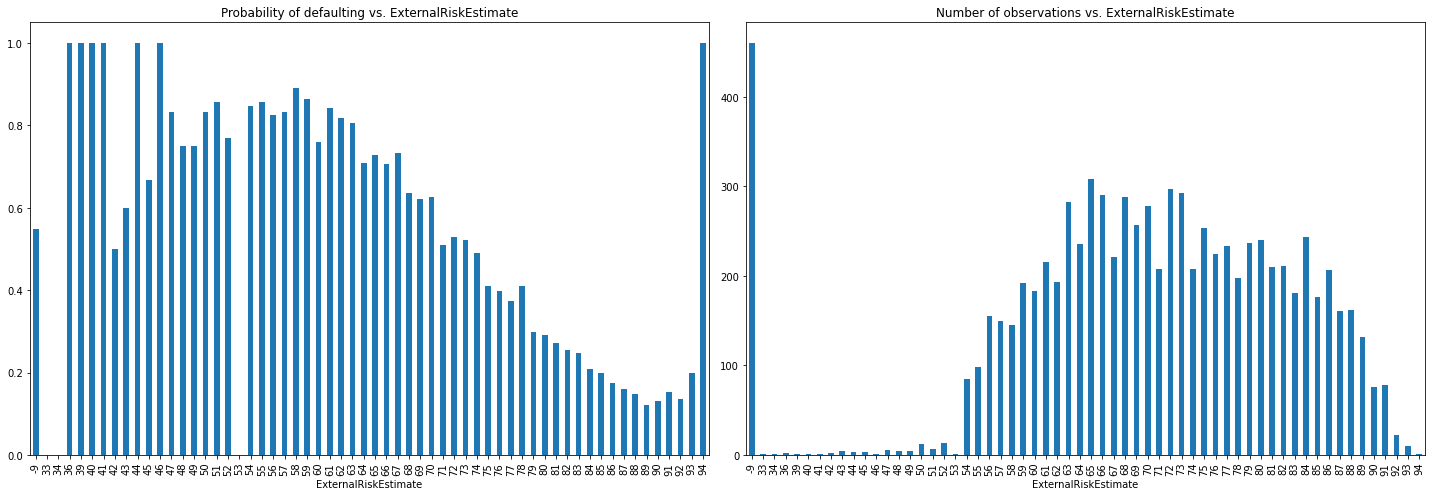

In [5]:
X = df.iloc[:,1:]
Y = (df.iloc[:,0]=='Bad').astype(int)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 1234)

df_train = pd.concat((X_train,Y_train),axis=1)
df_train = pd.concat((X_train,Y_train),axis=1)
means = df_train['RiskPerformance'].groupby(df['ExternalRiskEstimate']).mean()
counts = df_train['RiskPerformance'].groupby(df['ExternalRiskEstimate']).count()
fig, axes = plt.subplots(1,2, figsize=(20,7))
means.plot.bar(ax=axes[0], title='Probability of defaulting vs. ExternalRiskEstimate')
counts.plot.bar(ax=axes[1], title='Number of observations vs. ExternalRiskEstimate')
plt.tight_layout()

In [6]:
X_train = X_train[(X_train['ExternalRiskEstimate'].notna())&(X_train['ExternalRiskEstimate']!=-9)]
X_test  = X_test[(X_test['ExternalRiskEstimate'].notna())&(X_test['ExternalRiskEstimate']!=-9)]
Y_train = Y_train.loc[X_train.index]
Y_test  = Y_test.loc[X_test.index]

In [7]:
df_count_missing = pd.concat([(X_train==-7).sum(), (X_train==-8).sum(), (X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]

from sklearn.impute import MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])
 
pipe_example = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean'))])


pipeline = pipe_example.fit(X_train)
arr_X_train_t = pipe_example.fit_transform(X_train)

In [8]:
minus_7_indicator_transformer = MissingIndicator(missing_values=-7, features='missing-only').fit(X_train) # notice the -8
minus_8_indicator_transformer = MissingIndicator(missing_values=-8, features='missing-only').fit(X_train) # notice the -8

col_names_minus_7 = X_train.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) 
col_names_minus_8 = X_train.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))
#print(col_names_minus_8)
column_names = X_train.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
###
X_train_t = pd.DataFrame(arr_X_train_t, columns = column_names)

In [9]:
Xt = pipeline.transform(X_test)
X_test_t = pd.DataFrame(Xt,columns = column_names)
X_test_t

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,75.0,232.0,5.0,69.0,34.0,0.0,0.0,97.0,65.00000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,114.0,3.0,49.0,21.0,0.0,0.0,100.0,21.86799,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,63.0,209.0,7.0,92.0,7.0,1.0,1.0,88.0,2.00000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78.0,191.0,7.0,81.0,29.0,0.0,0.0,100.0,21.86799,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,75.0,56.0,69.0,2.0,1.0,0.0,33.0,15.00000,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,87.0,230.0,6.0,96.0,27.0,0.0,0.0,100.0,21.86799,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1950,61.0,178.0,1.0,45.0,48.0,0.0,0.0,100.0,21.86799,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1951,59.0,367.0,207.0,263.0,3.0,2.0,1.0,50.0,1.00000,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1952,75.0,183.0,1.0,81.0,31.0,0.0,0.0,100.0,21.86799,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
X_train_t_tr,X_train_t_val,Y_train_t_tr,Y_train_t_val = train_test_split(X_train_t,Y_train,test_size=0.25,random_state = 1234)


In [11]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn import tree, linear_model, neighbors  
from sklearn import svm
clf_tree    = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_svm     = svm.SVC(kernel='linear').fit(X_train_t_tr, Y_train_t_tr)
nb          = BernoulliNB().fit(X_train_t_tr, Y_train_t_tr)                                      # Naive Bayes
lda         = LinearDiscriminantAnalysis().fit(X_train_t_tr, Y_train_t_tr)                       # LDA

In [12]:
from sklearn.metrics import accuracy_score
print('Decision tree accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regression accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))
print('SVM accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_svm.predict(X_train_t_val)))
print('Naive Bayes accuracy: %.3f'%nb.score(X_train_t_tr, Y_train_t_tr))
print('LDA accuracy: %.3f'%lda.score(X_train_t_tr, Y_train_t_tr)) 


Decision tree accuracy: 0.632
Logistic regression accuracy: 0.744
KNN accuracy: 0.679
SVM accuracy: 0.743
Naive Bayes accuracy: 0.676
LDA accuracy: 0.741


In [13]:
#use cross-validation to evaluate models.
from sklearn.model_selection import cross_validate
cv_results_tree = cross_validate(tree.DecisionTreeClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_log_reg = cross_validate(linear_model.LogisticRegression(max_iter=10000), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_knn = cross_validate(neighbors.KNeighborsClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)
from sklearn.model_selection import cross_val_score # cross validation
cv_results_svm = cross_validate(svm.SVC(), X_train_t, Y_train, cv=5, return_estimator=True)
#cv_results_svm = cross_val_score(svm.SVC(kernel='linear',C=1), X_train, Y_train, cv=5)
cv_results_nb = cross_validate(BernoulliNB(), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_lda = cross_validate(LinearDiscriminantAnalysis(), X_train_t, Y_train, cv=5, return_estimator=True)

print('Classification tree - CV accuracy score %.3f'%cv_results_tree['test_score'].mean()) # this is their average value
print('Logistic regresion - CV accuracy score %.3f'%cv_results_log_reg['test_score'].mean()) # this is their average value
print('KNN - CV accuracy score %.3f'%cv_results_knn['test_score'].mean()) # this is their average value
print('SVM - CV accuracy score %.3f'%cv_results_svm['test_score'].mean()) # this is their average value
print('Naive Bayes - CV accuracy: %.3f'%cv_results_nb['test_score'].mean())
print('LDA - CV accuracy: %.3f'%cv_results_lda['test_score'].mean()) 

Classification tree - CV accuracy score 0.630
Logistic regresion - CV accuracy score 0.740
KNN - CV accuracy score 0.677
SVM - CV accuracy score 0.732
Naive Bayes - CV accuracy: 0.676
LDA - CV accuracy: 0.741


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

parameters = {'penalty':('l1', 'l2'), 'C':[1, 2, 4], 'solver':('lbfgs','sag', 'saga','newton-cg')}
logi = linear_model.LogisticRegression()
logi_par = GridSearchCV(logi, parameters, n_jobs=-1)
logi_par.fit(X_train, Y_train)

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.71354509        nan 0.71354541 0.71379882
 0.71341867 0.73504535        nan        nan 0.71341867        nan
 0.71443093 0.71392532 0.71341867 0.73491885        nan        nan
 0.71341867        nan 0.7140515  0.71379882 0.71341867 0.73491885]
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 4], 'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'sag', 'saga', 'newton-cg')})

In [15]:
logi_par.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [16]:
cv_results_log_reg2 = cross_validate(linear_model.LogisticRegression(max_iter=10000,C=1,penalty='l2',solver='newton-cg'), X_train_t, Y_train, cv=5, return_estimator=True)
print('Logistic regresion - CV accuracy score %.3f'%cv_results_log_reg2['test_score'].mean()) 


Logistic regresion - CV accuracy score 0.741


In [17]:
parameters = {'n_neighbors':[3,4,5,6,7,8,9,10], 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
knn = neighbors.KNeighborsClassifier()
knn_par = GridSearchCV(knn, parameters, n_jobs=-1)
knn_par.fit(X_train, Y_train)
knn_par.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 9}

In [18]:
cv_results_knn2 = cross_validate(neighbors.KNeighborsClassifier(n_neighbors=9,algorithm='ball_tree'), X_train_t, Y_train, cv=5, return_estimator=True)
print('knn - CV accuracy score %.3f'%cv_results_knn2['test_score'].mean()) 


knn - CV accuracy score 0.691


In [ ]:
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.01,0.1,1,5], 'gamma':[0.125,0.5,1,4]}
svr = svm.SVC()
svm_par = GridSearchCV(svr, parameters, n_jobs=-1)
svm_par.fit(X_train, Y_train)
svm_par.best_params_

In [ ]:
#help(svm.SVC)